# Flower GAN
GAN for generating images of flowers

In [1]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [2]:
import matplotlib.pyplot as plt
from keras import layers
#import tensorflow.keras.backend as K
import time

Setup kaggle environment

In [3]:
from google.colab import drive

# Setup API token
drive.mount("/content/gdrive")
!mkdir ~/.kaggle
!cp gdrive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install kaggle
!pip install kaggle

Mounted at /content/gdrive


In [4]:
# Download dataset
!kaggle datasets download -d l3llff/flowers

 95% 217M/228M [00:10<00:00, 20.7MB/s]
100% 228M/228M [00:10<00:00, 22.9MB/s]


In [5]:
# Unzip dataset
!unzip flowers.zip

Streaming output truncated to the last 5000 lines.
  inflating: flowers/magnolia/2090666304_0ff8463c5f_c.jpg  
  inflating: flowers/magnolia/20914736071_ede33a230a_c.jpg  
  inflating: flowers/magnolia/2126107417_92101f8b5f_c.jpg  
  inflating: flowers/magnolia/21500695820_bc9f753d79_c.jpg  
  inflating: flowers/magnolia/21986337916_36d1c95e64_c.jpg  
  inflating: flowers/magnolia/2294580412_50846f9130_c.jpg  
  inflating: flowers/magnolia/2300805045_982fa1bdf2_c.jpg  
  inflating: flowers/magnolia/2306786428_99f92b0d9c_c.jpg  
  inflating: flowers/magnolia/2324281515_c0269d5963_c.jpg  
  inflating: flowers/magnolia/2325102200_1cb9d8cabc_c.jpg  
  inflating: flowers/magnolia/2325102996_5f1e3bf13a_c.jpg  
  inflating: flowers/magnolia/2325370643_f452e88ace_c.jpg  
  inflating: flowers/magnolia/2334886646_c4c8ee532e_c.jpg  
  inflating: flowers/magnolia/23422365843_3b4b928a4a_c.jpg  
  inflating: flowers/magnolia/2365264040_1ff8f1fed3_c.jpg  
  inflating: flowers/magnolia/23678831170_c9b

In [6]:
BUFFER_SIZE = 16000
BATCH_SIZE = 32

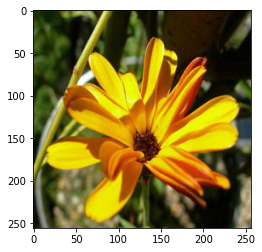

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("flowers/calendula/1010982154_242fbe2cb0_c.jpg")
imgplot = plt.imshow(img)
plt.show()

In [8]:
IMG_SIZE = [128, 128, 3]
NUM_CLASSES = 16

In [9]:
# Load dataset
flowers_dataset = tf.keras.utils.image_dataset_from_directory(
    "flowers",
    labels=None,                          # No labels required for this
    image_size=[IMG_SIZE[0], IMG_SIZE[1]] # Resize the image
)

Found 15740 files belonging to 1 classes.


In [10]:
#model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [11]:
# Make generator network
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8192, use_bias=False, input_shape=(NUM_CLASSES,)))
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization())
    #model.add(layers.Activation('sigmoid'))
    model.add(layers.Reshape((4, 4, 512)))
    assert model.output_shape == (None, 4, 4, 512)

    model.add(layers.UpSampling2D((2, 2), interpolation="bilinear"))
    assert model.output_shape == (None, 8, 8, 512)
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, 8, 8, 512)

    model.add(layers.UpSampling2D((2, 2), interpolation="bilinear"))
    assert model.output_shape == (None, 16, 16, 512)
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(512, (3, 3), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, 16, 16, 512)

    model.add(layers.UpSampling2D((2, 2), interpolation="bilinear"))
    assert model.output_shape == (None, 32, 32, 512)
    model.add(layers.Conv2DTranspose(256, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(256, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(256, (3, 3), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, 32, 32, 256)

    model.add(layers.UpSampling2D((2, 2), interpolation="bilinear"))
    assert model.output_shape == (None, 64, 64, 256)
    model.add(layers.Conv2DTranspose(128, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(128, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(128, (3, 3), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, 64, 64, 128)

    model.add(layers.UpSampling2D((2, 2), interpolation="bilinear"))
    assert model.output_shape == (None, 128, 128, 128)
    model.add(layers.Conv2DTranspose(64, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(64, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2DTranspose(3, (3, 3), padding='same', use_bias=False))
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, IMG_SIZE[0], IMG_SIZE[1], IMG_SIZE[2])

    return model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


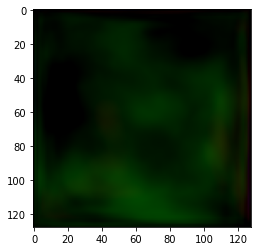

In [27]:
# Test (untrained) generator
generator = make_generator_model()

noise = tf.random.normal([1, NUM_CLASSES])
generated_image = generator(noise, training=False)

plt.imshow((generated_image[0] * 255))

In [13]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8192)              131072    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 8192)              0         
                                                                 
 batch_normalization (BatchN  (None, 8192)             32768     
 ormalization)                                                   
                                                                 
 reshape (Reshape)           (None, 4, 4, 512)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 8, 8, 512)        0         
 )                                                               
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 512)        2

In [14]:
# Make discriminator network
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu", input_shape=IMG_SIZE))
    model.add(layers.Conv2D(64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128*3, activation='sigmoid'))
    model.add(layers.Dense(1))
    return model

In [15]:
# Test (untrained) discriminator
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.1935797]], shape=(1, 1), dtype=float32)


In [16]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                  

In [17]:
# Loss function and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
cosine_loss = tf.keras.losses.CosineSimilarity(axis=1)

In [18]:
# Discriminator loss
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [19]:
# Generator loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def generator_loss2(fake_output, input, predicted_input):
    realism_loss = generator_loss(fake_output)
    gene_loss = tf.keras.losses.CategoricalCrossentropy()(input, predicted_input)
    total_loss = realism_loss + gene_loss
    return total_loss

In [28]:
# Load pre-trained flower classifier
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False,
                            input_shape=(128, 128,3))

# freeze extraction layers
base_model.trainable = False

# add custom top layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(base_model.output)
predictions = layers.Dense(16, activation='sigmoid')(x)
clf = tf.keras.Model(inputs=base_model.input, outputs=predictions)
clf.load_weights("flower_model.h5")

In [29]:
# Separate optimizers, as they don't train simultaneously
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)
clf_optimizer = tf.keras.optimizers.Adam(1e-4)

In [30]:
# Training loop
EPOCHS = 4
noise_dim = NUM_CLASSES
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [31]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape, tf.GradientTape() as clf_tape:
      generated_images = generator(noise, training=True)
      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)
      # Predict class of generated images
      pred_input = clf(generated_images)

      gen_loss = generator_loss(fake_output)
      #gen_loss = generator_loss2(fake_output, noise, pred_input)
      disc_loss = discriminator_loss(real_output, fake_output)

    #print("Type of 'noise' is {}".format(type(noise)))
    #print("Type of 'gen_loss' is {}".format(type(gen_loss)))
    #print("Type of 'cyc_loss' is {}".format(type(cyc_loss)))
    #print("cyc_loss = {}".format(cyc_loss))
    #print("gen_loss = {}".format(gen_loss))
    #print("Type of 'pred_input' is {}".format(type(pred_input)))
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    #gradients_of_classifier = clf_tape.gradient(cyc_loss, clf.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    #clf_optimizer.apply_gradients(zip(gradients_of_classifier, clf.trainable_variables))

In [32]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()
    # print("Epoch {}".format(epoch))
    for image_batch in dataset:
      train_step(image_batch)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  generate_and_save_images(generator, epochs, seed)


In [33]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(16, 16))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i] * 255)
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()


Time for epoch 1 is 156.22954058647156 sec
Time for epoch 2 is 146.73006963729858 sec
Time for epoch 3 is 146.83483123779297 sec
Time for epoch 4 is 146.82066750526428 sec


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

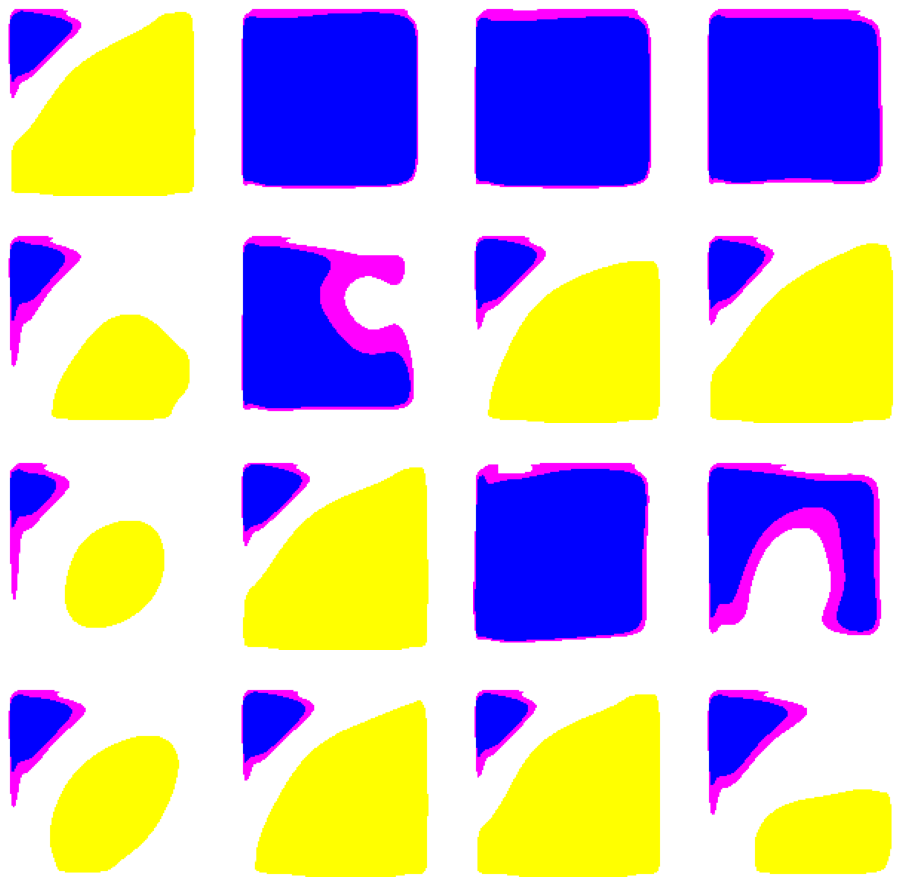

In [34]:
# Train
train(flowers_dataset, EPOCHS)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

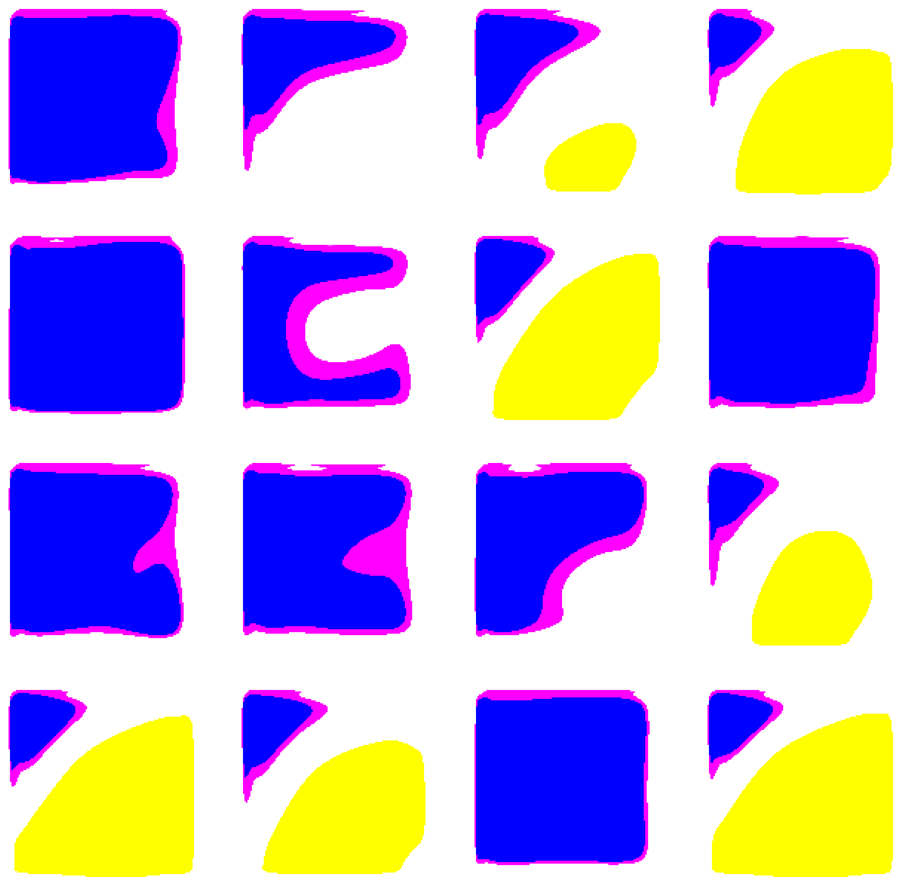

In [37]:
generate_and_save_images(generator, EPOCHS, tf.random.normal([num_examples_to_generate, noise_dim]))

In [36]:
# Save generator
generator.save('gdrive/MyDrive/iris_gan3.h5')
# Load generator
#generator_final = tf.keras.models.load_model('iris_gan.h5')